In [1]:
import re
import keras.models
import spacy
import fitz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

nlp = spacy.load('model/model_job')

In [2]:
def extract_text(filePath, remove_line=False):
    with fitz.open(filePath) as doc:
        finaltext = ""
        for page in doc:
            text = page.get_text()
            text = text.replace("\n"," ")
            text = text.replace("[^a-zA-Z0-9]", " ");
            text = re.sub('\W+',' ', text)
            text = re.sub('[^A-Za-z0-9]',' ', text)
            finaltext += text

        if remove_line:
            finaltext = text = re.sub('\s', " ", text)

    return finaltext

def extract_job(text, nlp):
    doc = nlp(text)

    job = set()

    for a in doc.ents:
        job.add(str(a).lower())

    return job

def seq_and_pad(sentences, tokenizer):
    sequences = tokenizer.texts_to_sequences(sentences)

    padded_sequences = pad_sequences(sequences, maxlen=30, padding='post')


    return padded_sequences

In [3]:
df = pd.read_csv('sample/train.csv')

df.head()

,Unnamed: 0,Email,key,Nama Peserta,MD,MI,MS,MC,LD,LI,...,KERJASAMA,KETERAMPILAN_INTERPERSONAL,LOGIKA_BERPIKIR,MOTIVASI_BERPRESTASI,ORIENTASI_HASIL,PENYELESAIAN_MASALAH,SISTEMATIKA_KERJA,pil_jabatan,prosen_kecocokan,hasil_rekomendasi
0,1,ariefwijayakusuma96@gmail.com,network administrator permanent address custo...,Arief Wijaya Kusuma,6,3,2,8,5,5,...,2,2,4,3,3,4,3,standar,92%,Disarankan
1,2,atkamliaa@gmail.com,human capital trainer credit assistant market...,Atikah Amalia,7,3,2,6,4,5,...,3,2,2,3,2,3,2,standar,79%,Dipertimbangkan
2,3,deri45anggraini@gmail.com,commissioner deputy head of public relations ...,Deri Firma Anggraini,8,2,3,7,4,4,...,3,2,5,3,3,3,3,standar,95%,Disarankan
3,4,elisabethda1994@gmail.com,hrd staff hr human capital student,Elisabeth Dwi Anggraeni,8,3,2,5,4,5,...,3,2,5,3,3,4,3,standar,95%,Disarankan
4,5,jordyrevindra@gmail.com,head division of public relations business pr...,Jordy Revindra Priana,5,4,3,7,5,5,...,3,3,2,2,2,3,3,standar,85%,Disarankan


In [4]:
df = df.loc[:, 'Email':'hasil_rekomendasi']
df['key'] = df['key'].astype('str')
df

,Email,key,Nama Peserta,MD,MI,MS,MC,LD,LI,LS,...,KERJASAMA,KETERAMPILAN_INTERPERSONAL,LOGIKA_BERPIKIR,MOTIVASI_BERPRESTASI,ORIENTASI_HASIL,PENYELESAIAN_MASALAH,SISTEMATIKA_KERJA,pil_jabatan,prosen_kecocokan,hasil_rekomendasi
0,ariefwijayakusuma96@gmail.com,network administrator permanent address custo...,Arief Wijaya Kusuma,6,3,2,8,5,5,6,...,2,2,4,3,3,4,3,standar,92%,Disarankan
1,atkamliaa@gmail.com,human capital trainer credit assistant market...,Atikah Amalia,7,3,2,6,4,5,5,...,3,2,2,3,2,3,2,standar,79%,Dipertimbangkan
2,deri45anggraini@gmail.com,commissioner deputy head of public relations ...,Deri Firma Anggraini,8,2,3,7,4,4,5,...,3,2,5,3,3,3,3,standar,95%,Disarankan
3,elisabethda1994@gmail.com,hrd staff hr human capital student,Elisabeth Dwi Anggraeni,8,3,2,5,4,5,6,...,3,2,5,3,3,4,3,standar,95%,Disarankan
4,jordyrevindra@gmail.com,head division of public relations business pr...,Jordy Revindra Priana,5,4,3,7,5,5,5,...,3,3,2,2,2,3,3,standar,85%,Disarankan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,adzkiaaulia@gmail.com,secretary supporting services intern facilita...,Aulia Adzkia Fauzi,7,2,2,6,5,6,4,...,2,2,4,3,4,4,3,standar,92%,Disarankan
90,davidacroos@gmail.com,frontliner admin data entry operations manage...,David Pratama,10,2,3,4,9,6,4,...,3,3,3,3,3,4,2,standar,95%,Disarankan
91,deapandhita@gmail.com,logistic administration staff secretary senio...,Regina Dea Pandhita Putri,6,3,4,6,5,6,6,...,3,2,3,3,3,3,3,standar,95%,Disarankan
92,dhiaulfa.thufaila@gmail.com,human resources management financial manager ...,Dhiaulfa Thufaila,5,2,0,9,4,6,4,...,2,2,2,3,3,4,3,standar,87%,Disarankan


In [5]:
df.columns

Index(['Email', 'key', 'Nama Peserta', 'MD', 'MI', 'MS', 'MC', 'LD', 'LI',
       'LS', 'LC', 'CD', 'CI', 'CS', 'CC', 'Grafik1', 'Grafik2', 'Grafik3',
       'Hasil', 'GTQ1', 'GTQ2', 'GTQ3', 'GTQ4', 'GTQ5', 'Average GTQ', 'SS1',
       'SS2', 'SS3', 'SS4', 'Jumlah', 'IQ', 'N', 'G', 'A', 'L', 'P', 'I', 'T',
       'V', 'X', 'S', 'B', 'O', 'R', 'D', 'C', 'Z', 'E', 'K', 'F', 'W',
       'DAYA_ANALISA', 'FLEXIBILITAS', 'KEMAMPUAN_MEMIMPIN',
       'KEMAMPUAN_NUMERIKAL', 'KEMAMPUAN_PERENCANAAN', 'KEMAMPUAN_VERBAL',
       'KERJASAMA', 'KETERAMPILAN_INTERPERSONAL', 'LOGIKA_BERPIKIR',
       'MOTIVASI_BERPRESTASI', 'ORIENTASI_HASIL', 'PENYELESAIAN_MASALAH',
       'SISTEMATIKA_KERJA', 'pil_jabatan', 'prosen_kecocokan',
       'hasil_rekomendasi'],
      dtype='object')

In [25]:
traits = 'MD'

feature = []
label = []

for i, row in df.iterrows():
    feature.append(df.at[i, 'key'])
    label.append(df.at[i, traits])

feature_train = feature[:84]
feature_test = feature[84:]

label_train = label[:84]
label_test = label[84:]

tokenizer = Tokenizer(num_words=1000, oov_token='OOV')
tokenizer.fit_on_texts(feature)

feature_train = np.asarray(seq_and_pad(feature_train, tokenizer))
feature_test = np.asarray(seq_and_pad(feature_test, tokenizer))

label_train = np.asarray(label_train)
label_test = np.asarray(label_test)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 16, input_length=30),
    tf.keras.layers.Conv1D(256, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Set the training parameters
model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer='adam')

# Print the model summary
history = model.fit(feature_train,
                    label_train,
                    epochs=100,
                    validation_data=(feature_test, label_test),
                    verbose=2)

Epoch 1/100
3/3 - 5s - loss: 6.3803 - val_loss: 7.7921 - 5s/epoch - 2s/step
Epoch 2/100
3/3 - 0s - loss: 6.2606 - val_loss: 7.6708 - 94ms/epoch - 31ms/step
Epoch 3/100
3/3 - 0s - loss: 6.1254 - val_loss: 7.5342 - 142ms/epoch - 47ms/step
Epoch 4/100
3/3 - 0s - loss: 5.9908 - val_loss: 7.3705 - 76ms/epoch - 25ms/step
Epoch 5/100
3/3 - 0s - loss: 5.8152 - val_loss: 7.1718 - 88ms/epoch - 29ms/step
Epoch 6/100
3/3 - 0s - loss: 5.5700 - val_loss: 6.9260 - 91ms/epoch - 30ms/step
Epoch 7/100
3/3 - 0s - loss: 5.3150 - val_loss: 6.6187 - 63ms/epoch - 21ms/step
Epoch 8/100
3/3 - 0s - loss: 4.9470 - val_loss: 6.2338 - 76ms/epoch - 25ms/step
Epoch 9/100
3/3 - 0s - loss: 4.5659 - val_loss: 5.7530 - 62ms/epoch - 21ms/step
Epoch 10/100
3/3 - 0s - loss: 4.0084 - val_loss: 5.1550 - 53ms/epoch - 18ms/step
Epoch 11/100
3/3 - 0s - loss: 3.3557 - val_loss: 4.4151 - 137ms/epoch - 46ms/step
Epoch 12/100
3/3 - 0s - loss: 2.5909 - val_loss: 3.5172 - 105ms/epoch - 35ms/step
Epoch 13/100
3/3 - 0s - loss: 2.0702 -

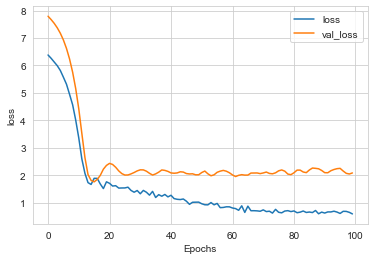

In [30]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history, "loss")

In [31]:
model.predict(feature_train[[11]])

1/1 [==============================] - 0s 180ms/step


array([[5.4046445]], dtype=float32)

In [15]:
model.evaluate(feature_test, label_test)

1/1 [==============================] - 0s 50ms/step - loss: 2.0847


2.084667205810547

In [32]:
pred = model.predict(feature_test)
result = datas = {'pred':pred, 'true':label_test}
for i in range(len(label_test)):
    print('pred : {} label : {}'.format(round(pred[i][0]), label[i]))

1/1 [==============================] - 0s 172ms/step
pred : 8 label : 6
pred : 6 label : 7
pred : 6 label : 8
pred : 6 label : 8
pred : 4 label : 5
pred : 6 label : 4
pred : 7 label : 3
pred : 7 label : 7
pred : 6 label : 5
pred : 6 label : 9


In [ ]:
model.save('{}.h5'.format(traits))